In [1]:
from rdkit import Chem, RDLogger
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
import numpy 


RDLogger.DisableLog("rdApp.*")

In [2]:
rxn_cls = []
products = []
sources = []
def construct_atomic_number_array(mol, out_size=-1):
    """Returns atomic numbers of atoms consisting a molecule.

    Args:
        mol (rdkit.Chem.Mol): Input molecule.
        out_size (int): The size of returned array.
            If this option is negative, it does not take any effect.
            Otherwise, it must be larger than the number of atoms
            in the input molecules. In that case, the tail of
            the array is padded with zeros.

    Returns:
        numpy.ndarray: an array consisting of atomic numbers
            of atoms in the molecule.
    """
    CHIRAL_TAG = [Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
              Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW
              ]
    CHIRAL_TAG_DICT = {i: ct for i, ct in enumerate(CHIRAL_TAG)}

    atom_list = [CHIRAL_TAG_DICT[a.GetChiralTag()] for a in mol.GetAtoms()]
    atomc_list = [a.GetIdx() for a in mol.GetAtoms() if a.GetAtomicNum()==6]
    atom_list = [a.GetAtomicNum() for a in mol.GetAtoms()]
    n_atom = len(atom_list)
    choice_ls = [0,1,2] # 1=Insert; 2=Replace; 3=Delete
    
    random_choice = numpy.random.choice(choice_ls, 1)[0]
    choicetag=[0,1]
    random_tag = numpy.random.choice(choicetag, 1)[0]
    if random_choice==0:
        pass
    else:
        for i in range(random_choice):
            #random_choice_location = numpy.random.choice(atomc_list, 1)[0]
            try:
                index=0
                for random_choice_location in atomc_list:
                    mol.GetAtomWithIdx(random_choice_location).SetChiralTag(CHIRAL_TAG_DICT[random_tag])
                    index+=1
                    if index>=2:
                        break
            except:
                pass


            #     mol.GetAtomWithIdx(random_choice_location).SetChiralTag(CHIRAL_TAG_DICT[random_tag])
            # except:
            #     pass

           
    canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=True,
                                            canonical=True)
    return canonical_smiles


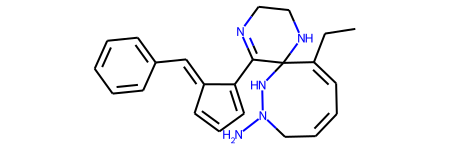

In [3]:

# f = open('/home/chengkaiyang/Main/Script/GF-VAE_Script/gfsample.txt',"r") 

f = open('/home/chengkaiyang/Main/t.txt',"r") 


    
x=[]
t=[]
for line in f.readlines():
    x.append(Chem.MolFromSmiles(line))


    # items = line.strip().split(' ')
    # mol=Chem.MolFromSmiles(line)
    # if mol:
    #     canonical_smiles=construct_atomic_number_array(mol)
    #     # canonical_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
    #     t.append(canonical_smiles)
    #     mol=Chem.MolFromSmiles(canonical_smiles)
    #     rxn_cls.append(mol)
# print(t[0])
x[1]


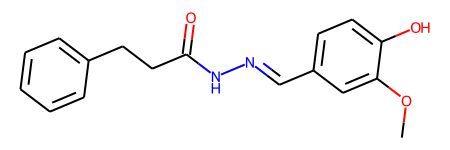

In [4]:
mol = Chem.MolFromSmiles('[C@H3]O[c@@]1cc(C=NNC(=O)CCc2ccccc2)ccc1O')
mol

In [5]:
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
out=pd.read_csv('/home/chengkaiyang/Main/data/gfvae.csv',index_col=0)
out.head()

,smiles
0,C[C@@]1(C(=O)C=C(O1)C(=O)[O-])c2ccccc2
1,c1ccc(cc1)C(c2ccccc2)[S@](=O)CC(=O)NO
2,CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N\C(=O)OC)/[nH]2
3,CCC[S@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2
4,CC(C)C[C@@H]1C(=O)N(C(=S)N1)CC=C


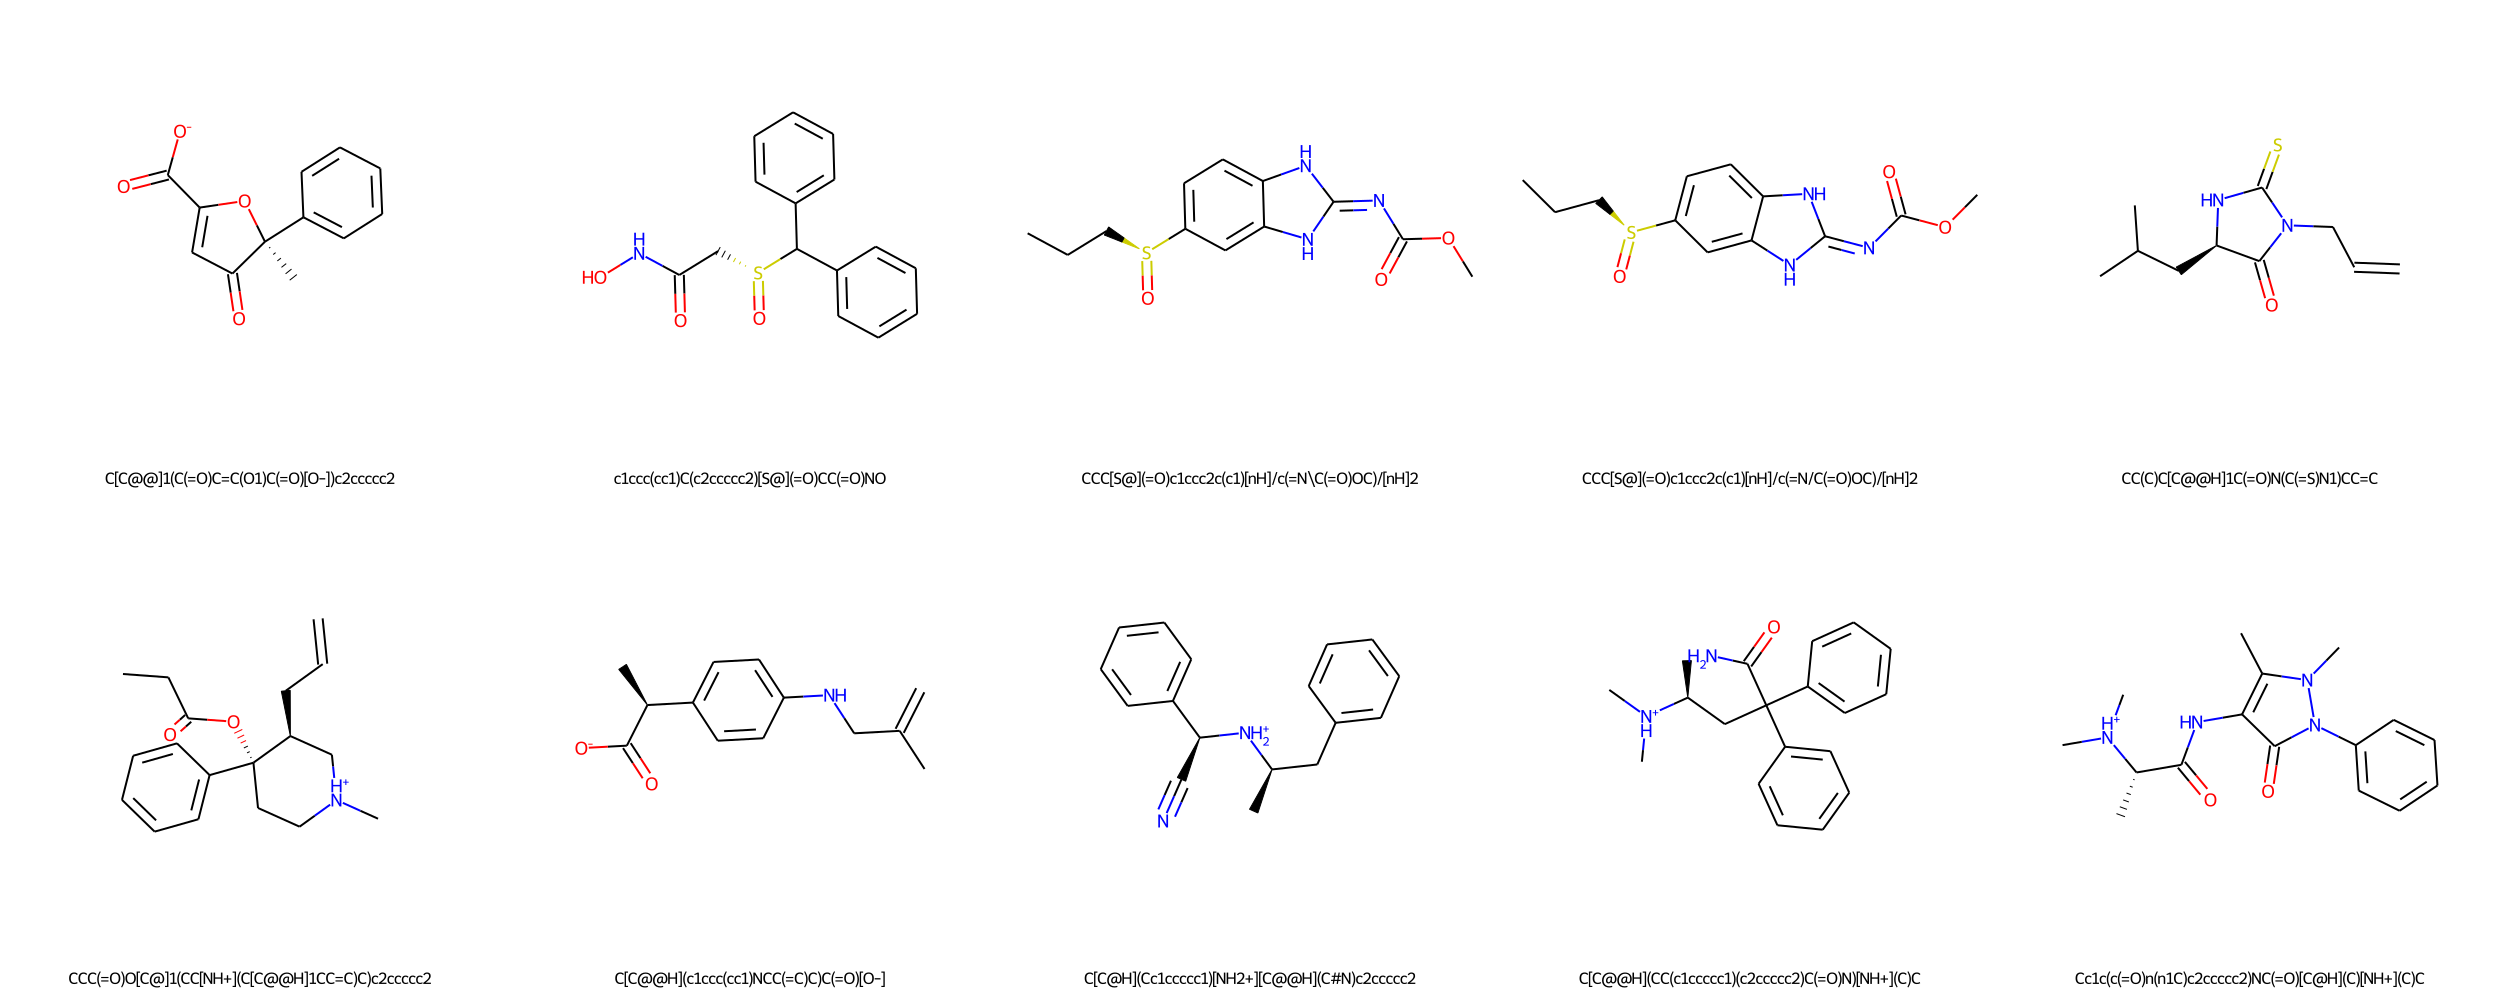

In [6]:
img = MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(out['smiles'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(out['smiles'])[:10])
img

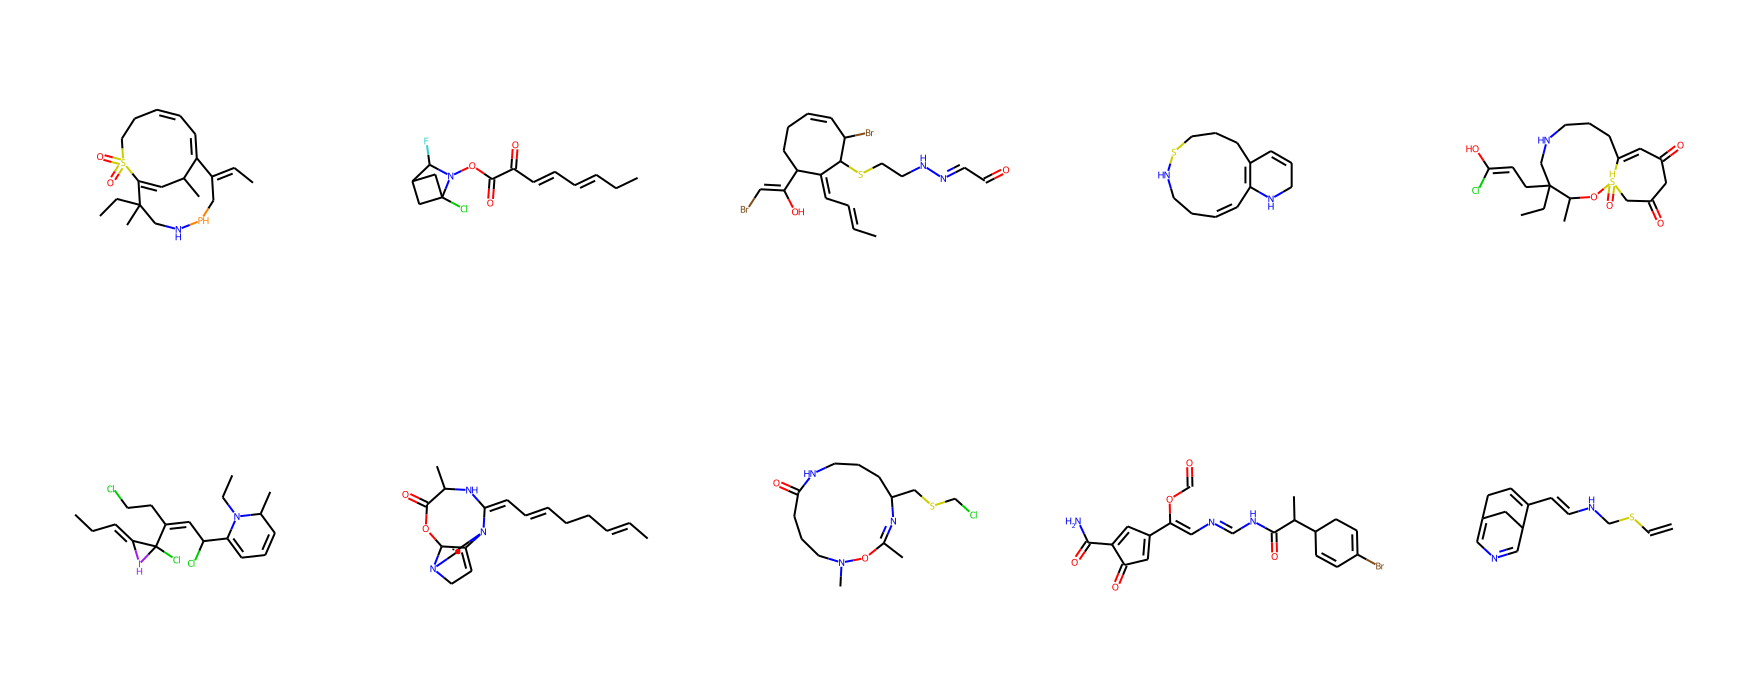

In [7]:

MolsToGridImage(
    [m for m in x if m is not None][10:20], molsPerRow=5, subImgSize=(350, 350)
)


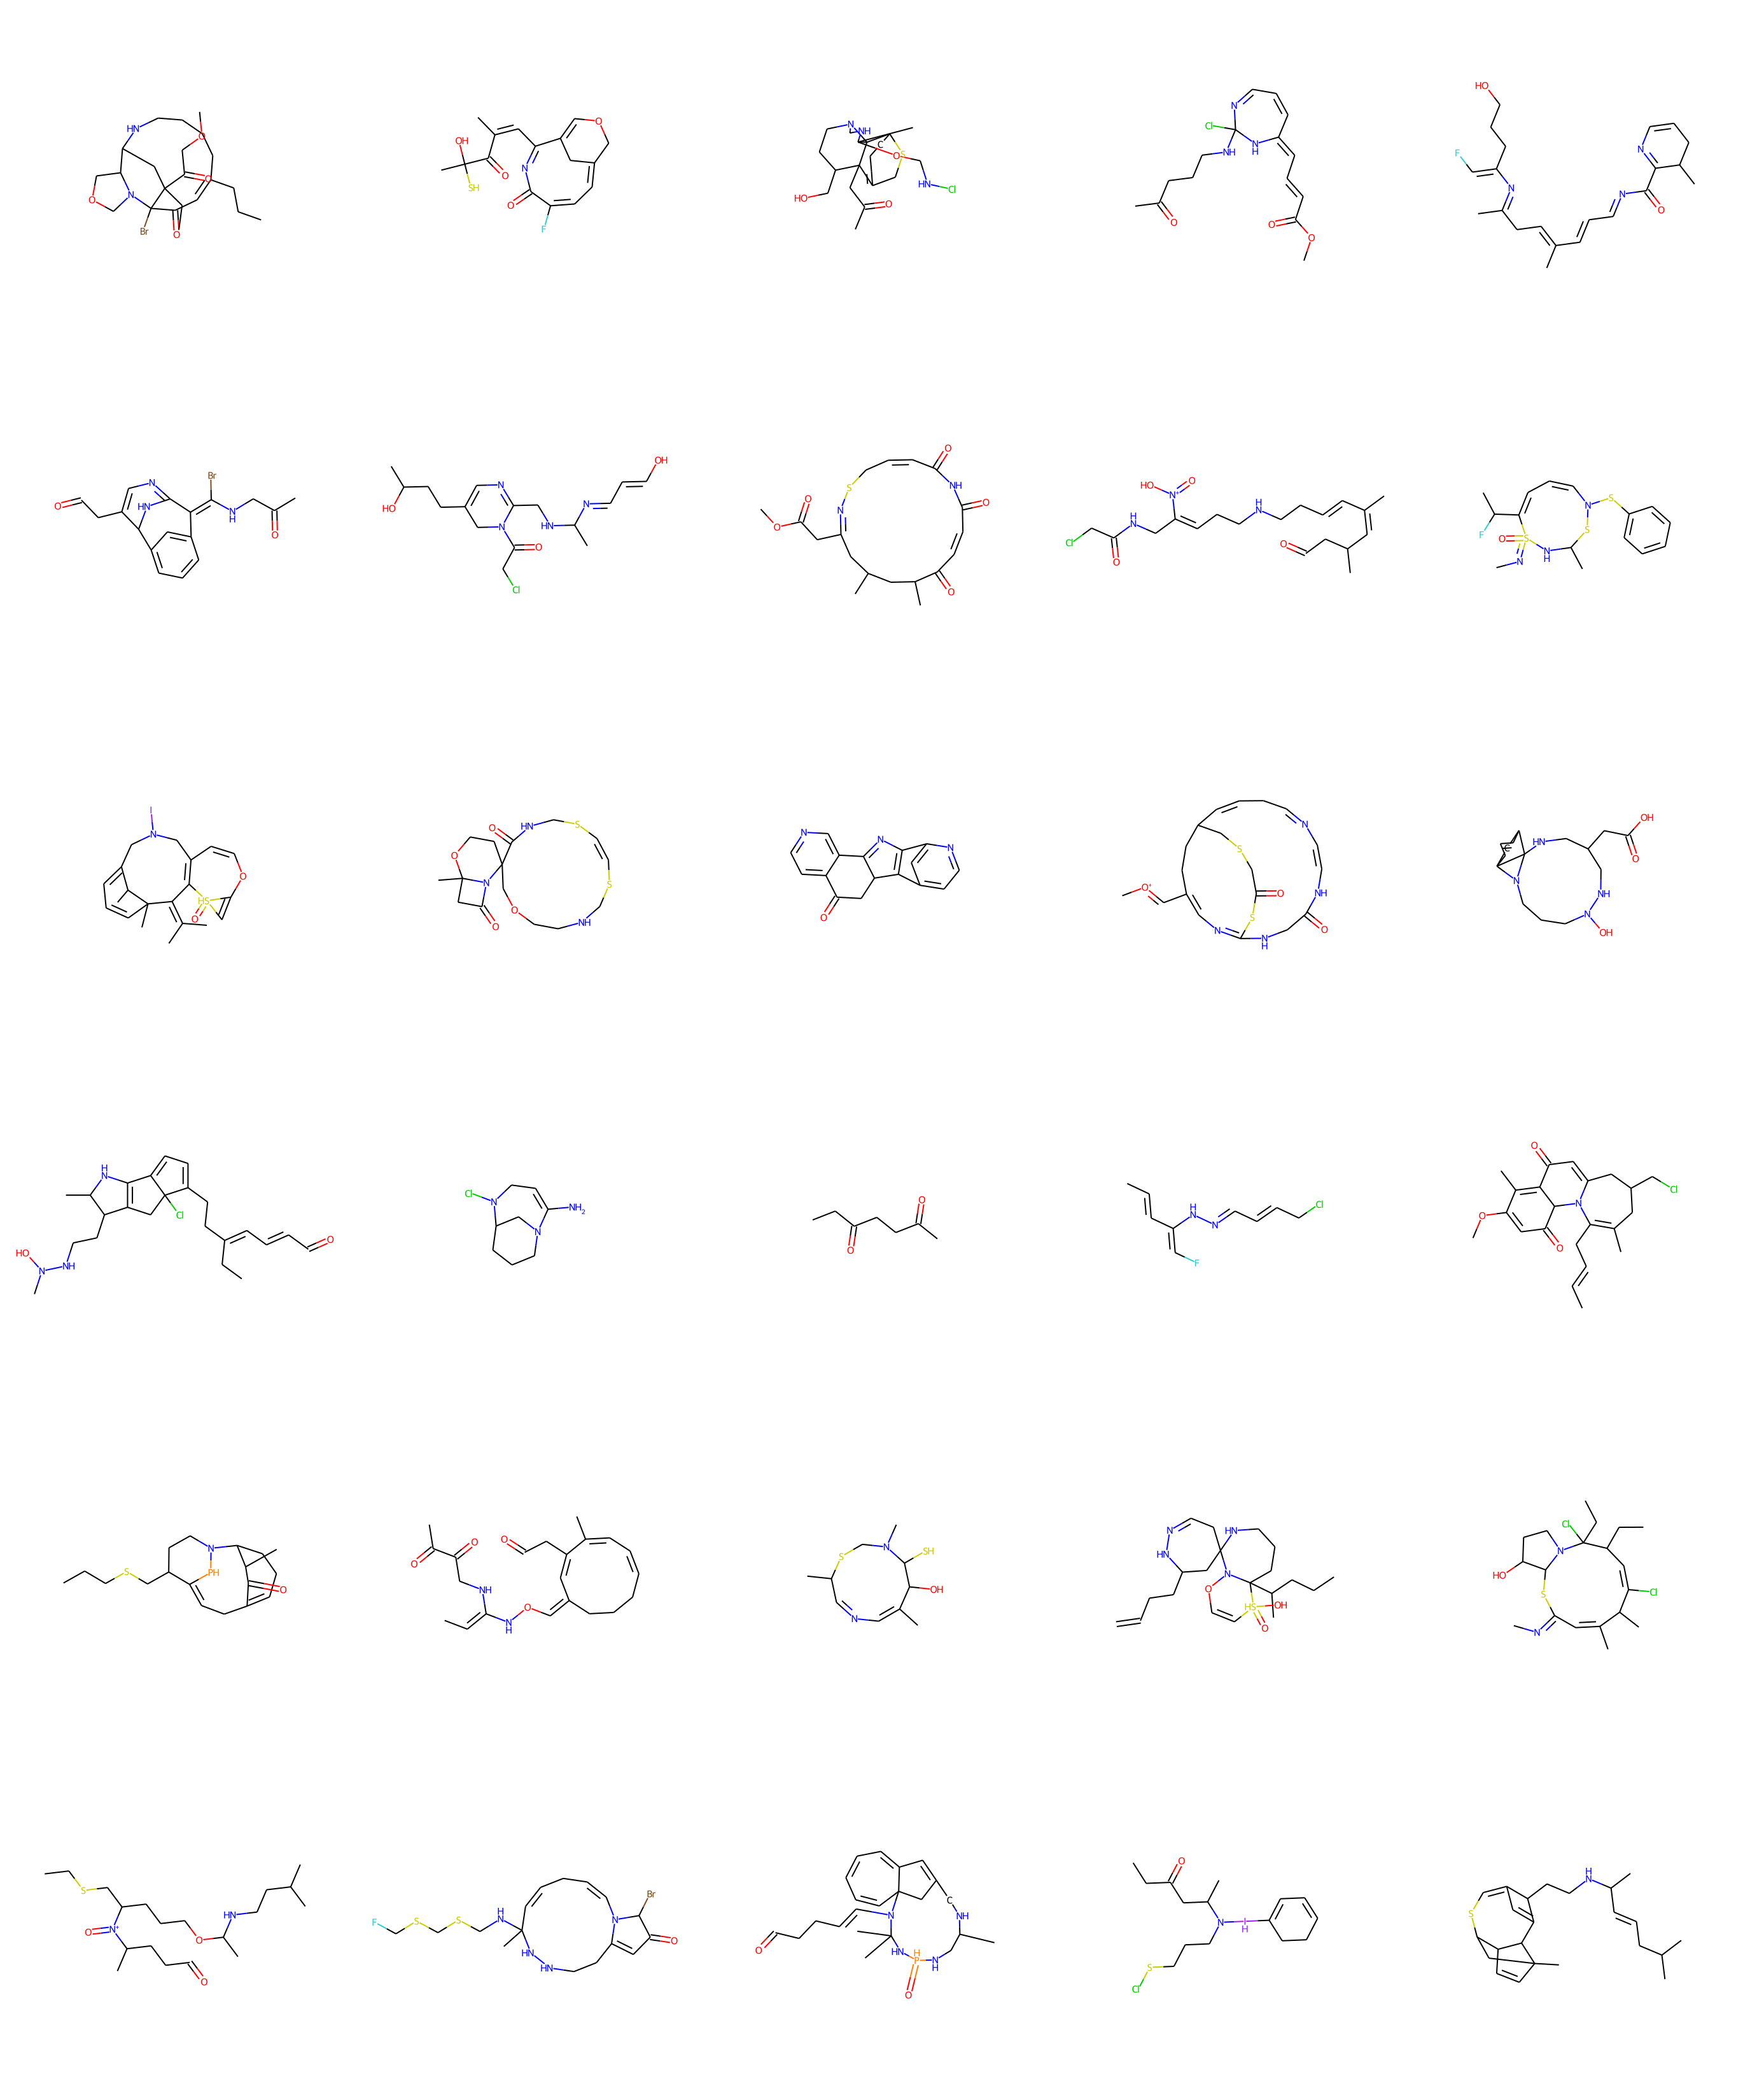

In [8]:
MolsToGridImage(
    [m for m in x if m is not None][50:80], molsPerRow=5, subImgSize=(550, 550)
)